# Первая неделя


#### Выполнил Ким Антон 
#### В рамках курса "Введение в машинное обучение" от Высшей школы экономики

## I. Предобработка данных в Pandas

### План работы
<ul>
 <li>работать с данными используя язык Python и пакет Pandas</li>
 <li>делать предобработку данных</li>
 <li>находить простые закономерности в данных</li>
</ul>

### Подключение библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Загрузка данных 

In [2]:
data = pd.read_csv('data/week_1_titanic.csv', index_col=['PassengerId'])

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.1+ KB


### Описание данных

<ul>
    <li><b>Survival</b> - Выжил или нет, бинарный (0-нет, 1-да)</li>
    <li><b>Pclass</b> - Класс билета, порядковый (1=1st, 2=2nd, 3=3rd)</li>
    <li><b>Name</b> - Имя пассажира</li>
    <li><b>Sex</b> - Пол</li>
    <li><b>Age</b> - Возраст в годах</li>
    <li><b>SibSp</b> - Жены/мужья на корабле</li>
    <li><b>Parch</b> - Дети/родители на корабле</li>
    <li><b>Ticket</b> - Номер билета</li>
    <li><b>Fare</b> - Стоимость билета</li>
    <li><b>Cabin</b> - Номер каюты</li>
    <li><b>Embarked</b> - Порт погрузки</li>
</ul>


### Инструкции по выполнению

#### 1. Какое количество мужчин и женщин ехало на корабле?

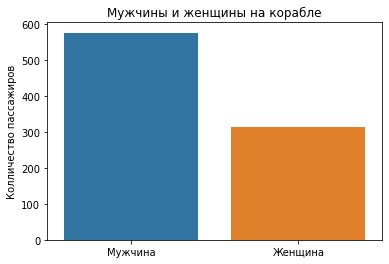

Мужчина    577
Женщина    314
Name: Sex, dtype: int64


In [5]:
values = data['Sex'].map({"female":"Женщина", "male":"Мужчина"})
fig = plt.figure()
sns.countplot(x=values)
plt.title('Мужчины и женщины на корабле')
plt.xlabel("")
plt.ylabel("Колличество пассажиров")
plt.show()
print(values.value_counts())

Исходя из данных, на корабле находились:<br>
**Женщин** - 314 <br>
**Мужчин** - 577

#### 2. Какой части пассажиров удалось выжить?

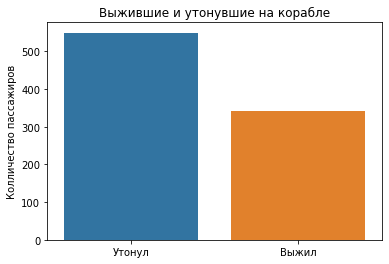

Утонул    0.616162
Выжил     0.383838
Name: Survived, dtype: float64


In [6]:
values = data['Survived'].map({0:'Утонул', 1:'Выжил'})
fig = plt.figure()
sns.countplot(x=values)
plt.title('Выжившие и утонувшие на корабле')
plt.xlabel('')
plt.ylabel('Колличество пассажиров')
plt.show()
print(values.value_counts(normalize=True))

Исходя из данных, после крушения **выжило около 38%** соответственно **62% погибли**

#### 3. Какую долю пассажиры первого класса составляли среди всех пассажиров? 

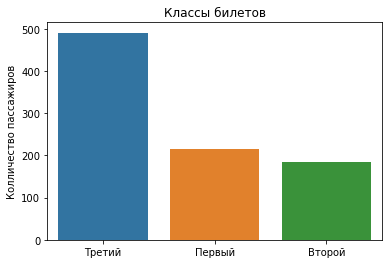

Третий    0.551066
Первый    0.242424
Второй    0.206510
Name: Pclass, dtype: float64


In [7]:
fig = plt.figure()
values = data['Pclass'].map({1:'Первый', 2:"Второй", 3:"Третий"})
sns.countplot(x=values)
plt.title('Классы билетов')
plt.xlabel("")
plt.ylabel("Колличество пассажиров")
plt.show()
print(values.value_counts(normalize=True))

Исходя из данных, на корабле было: <br>
**Первый** - 24% <br>
**Второй** - 21% <br>
**Третий** - 55% <br>

#### 4. Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров.

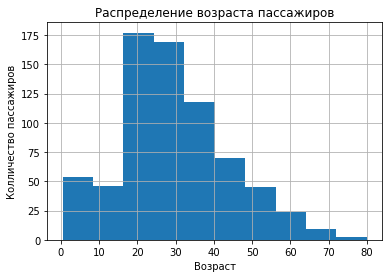

Медиана - 28.0
Средняя - 29.7


In [8]:
fig = plt.figure()
data['Age'].hist()
plt.title('Распределение возраста пассажиров')
plt.xlabel("Возраст")
plt.ylabel("Колличество пассажиров")
plt.show()
print(f"Медиана - {data['Age'].median()}")
print(f"Средняя - {round(data['Age'].mean(), ndigits=2)}")

#### 5. Коррелируют ли число братьев/сестер/супругов с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch.

In [9]:
data[['SibSp', 'Parch']].corr()['SibSp']['Parch']

0.41483769862015263

Имеется небольшая корреляция 

#### 6. Какое самое популярное женское имя на корабле? 

In [10]:
female = data['Name'].apply(lambda x: True if (x.find('Miss') > 0) or (x.find('Miss') > 0) else False)

In [11]:
data[female].shape

(182, 11)

In [12]:
def func(x):
    li = x.split()
    try:
        ind = li.index('Miss.') 
        return li[ind+1]
    except:
        ind = li.index('Mrs.') 
        return li[ind+1]

In [13]:
ser = data[female]['Name'].apply(func)

In [14]:
ser.value_counts()

Anna         9
Mary         9
Margaret     6
Elizabeth    5
Bertha       4
            ..
Joan         1
Jean         1
Jessie       1
Eliina       1
Adele        1
Name: Name, Length: 121, dtype: int64

Исходя из данных, можно сделать вывод, что самое часто встречающаеся женское имя - **Анна**

## II. Важность признаков

### Введение
Решающие деревья относятся к классу логических методов. Их основная идея состоит в объединении определенного количества простых решающих правил, благодаря чему итоговый алгоритм является интерпретируемым. Как следует из названия, решающее дерево представляет собой бинарное дерево, в котором каждой вершине сопоставлено некоторое правило вида "j-й признак имеет значение меньше b". В листьях этого дерева записаны числа-предсказания. Чтобы получить ответ, нужно стартовать из корня и делать переходы либо в левое, либо в правое поддерево в зависимости от того, выполняется правило из текущей вершины или нет.

Одна из особенностей решающих деревьев заключается в том, что они позволяют получать важности всех используемых признаков. Важность признака можно оценить на основе того, как сильно улучшился критерий качества благодаря использованию этого признака в вершинах дерева.

### План работы
<ul>
 <li>обучать решающие деревья</li>
 <li>находить наиболее важные для них признаки</li>
</ul>

### Подключение библиотек

In [15]:
from sklearn.tree import DecisionTreeClassifier

### Данные те же, что были в первом задании

### Инструкции по выполнению

##### 1. Оставьте в выборке четыре признака: класс пассажира (Pclass), цену билета (Fare), возраст пассажира (Age) и его пол (Sex). Обратите внимание, что признак Sex имеет строковые значения.

In [16]:
X = data[['Pclass', 'Fare', 'Age', 'Sex']].copy()
X['Sex'] = X['Sex'].map({'female':0, 'male':1})
X.head()

,Pclass,Fare,Age,Sex
PassengerId,,,,
1,3,7.2500,22.0,1
2,1,71.2833,38.0,0
3,3,7.9250,26.0,0
4,1,53.1000,35.0,0
5,3,8.0500,35.0,1


##### 2. Выделите целевую переменную — она записана в столбце Survived.

In [17]:
y = data['Survived']

##### 3. Найдите все объекты, у которых есть пропущенные признаки, и удалите их из выборки.

In [18]:
X = X.dropna()
y = y[X.index]
X.shape[0], data.shape[0]

(714, 891)

#####  4. Обучите решающее дерево с параметром random_state=241 и остальными параметрами по умолчанию (речь идет о параметрах конструктора DecisionTreeСlassifier).

In [19]:
model = DecisionTreeClassifier(random_state=241)
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=241, splitter='best')

In [20]:
model.feature_importances_

array([0.14000522, 0.30343647, 0.2560461 , 0.30051221])

<ul>
    <li><b>Pclass</b> - 0.14</li>
    <li><b>Sex</b> - 0.3 хороший признак</li>
    <li><b>Age</b> - 0.26</li>
    <li><b>Fare</b> - 0.3 хороший признак</li>
</ul>